In [1]:
from init import *


Getting English data
Getting French data
Getting emotion words and bird names


In [2]:
# precompute measures
k = 100
t1, t2 = 9, -1
pos = NOUN

measures_emotion_eng = nn_measure_over_words(words_eng, pos, pos_data, data, t1, t2, k)


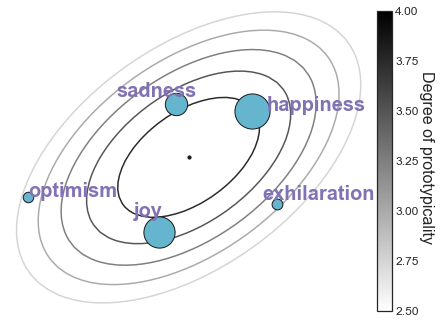

In [3]:
from scipy.stats import multivariate_normal
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
import seaborn as sns
sns.set_style("ticks")

# create contours for prototypicality
mu = [0, 0]
sigma = [[5, 2.5], [2.5, 5]]
rv =  multivariate_normal(mean=mu, cov=sigma)

n = 2.15
X, Y = np.mgrid[-n:n:0.1, -n:n:0.1]
fig, ax = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(11.69/1.5,8.27/1.5))
density = rv.pdf(np.dstack((X, Y))) * 100
c = ax.contour(X, Y, density + (4. - np.max(density)), [2.5,2.75,3,3.25,3.5,3.75,4], cmap='gist_yarg')
ax.scatter(mu[0], mu[1], color='k',zorder=10,s=10)

norm = Normalize(vmin=c.cvalues.min(), vmax=c.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap=c.cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ticks=c.levels, orientation='vertical', pad=0.035)
cbar.ax.tick_params(labelsize=12,size=0)
cbar.ax.text(6.75, 2.85, 'Degree of prototypicality', fontsize=16, rotation=270)

# label emotion words
positions = {
    'joy': (-0.35,-1.05),
    'happiness': (0.75, 0.65),
    'sadness': (-0.15, 0.75),
    'optimism': (-1.9, -0.55),
    'exhilaration': (1.05, -0.65),
}
offsets = {
    'joy': (-0.3,0.22),
    'happiness': (0.17,0.),
    'sadness': (-0.7,0.1),
    'optimism': (0,0),
    'exhilaration': (-0.18,0.05),
}

for w, pos in positions.items():
    offset = offsets[w]
    size = 100 * measures_emotion_eng[w] ** -6
    ax.scatter(pos[0], pos[1], color='c', zorder=10, s=size, edgecolors='k')
    ax.annotate(w, xy=pos, xytext=(pos[0]+offset[0],pos[1]+offset[1]), fontsize=20, color='m', fontweight='bold', zorder=15)
    
axis = ax.axis('off')
plt.savefig('images/figure1.svg', format='svg', bbox_inches='tight')
